In [1]:
#import basic libraries
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from sklearn.datasets import load_iris
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot

#Data source: https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2017/d4vt-q4t5
df = pd.read_csv(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2017.csv")
df = df.dropna()




C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def convertTimeStamp(string):
    """Converts a string to a datetime object."""
    
    time = datetime.strptime(string,'%m/%d/%Y %I:%M:%S %p') #Accepts time string, converts it to datetime object.
    return time

df['CreatedDate'] = df['CreatedDate'].dropna().apply(convertTimeStamp,0)
df['ServiceDate'] = df['ServiceDate'].dropna().apply(convertTimeStamp, 0)

def prepareData(dataframe):
    """modeled from: https://github.com/ayush159/NYC-311/blob/master/NYC311.ipynb"""
    df['Elapsed Days'] = (df['ServiceDate'] - df['CreatedDate']).dt.days
    df_clean=df[df['Elapsed Days'].notnull()]
    df_perfect = df_clean[df_clean['ServiceDate'] >= df_clean['CreatedDate']]
    df_perfect['Day of Week'] = df_perfect['CreatedDate'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['CreatedDate'].dt.day
    df_perfect['Month'] = df_perfect['CreatedDate'].dt.month
    df_perfect['Year'] = df_perfect['CreatedDate'].dt.year
    return df_perfect

df_LA = prepareData(df)

C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [3]:
#merge CD and CDMember columns
cd_mem_df = df_LA["CD"].astype(str) + ' / ' + df_LA["CDMember"]
df_LA.insert(31, 'CD/Member', cd_mem_df)

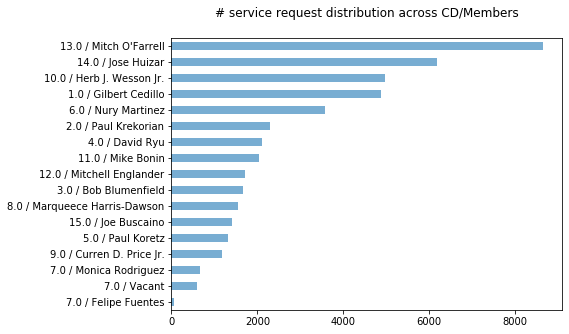

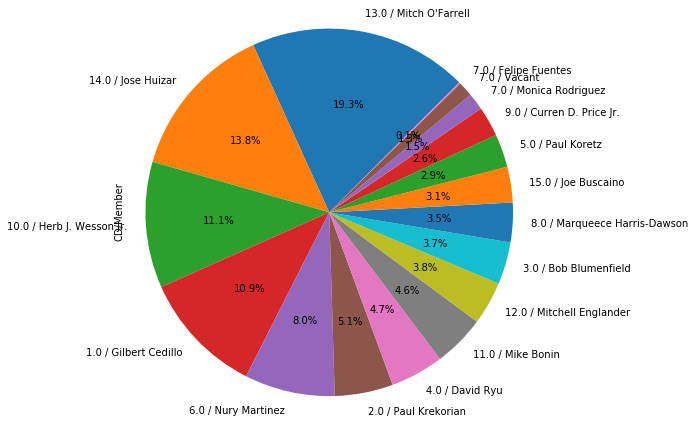

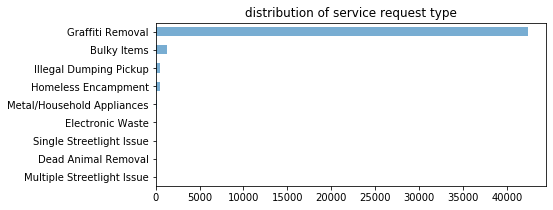

In [4]:
#split dataframe in two for at most 7 elapsed days and more than 7 elapsed days
is_week = df_LA['Elapsed Days'] <= 7
df_week = df_LA[is_week]
#print(df_week.head())

df_week['CD/Member'].value_counts().sort_values(ascending=True).plot(kind='barh',alpha=0.6,figsize=(7,5))
plt.title('# service request distribution across CD/Members\n')
plt.show()

df_week['CD/Member'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=45, shadow=False, figsize = (8,6))
#plt.legend(title='CD', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.tight_layout()
plt.show()

df_week['RequestType'].value_counts().sort_values(ascending=True).plot(kind='barh',alpha=0.6,figsize=(7,3))
plt.title('distribution of service request type')
plt.show()

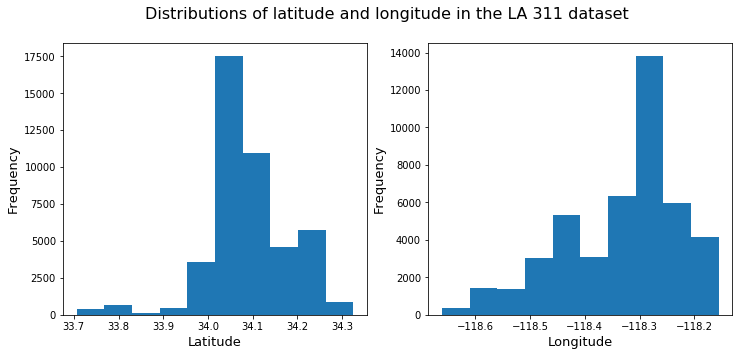

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions of latitude and longitude in the LA 311 dataset', fontsize=16)
ax1.hist(df_week['Latitude'])
ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax2.hist(df_week['Longitude'])
ax2.set_xlabel('Longitude', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13);

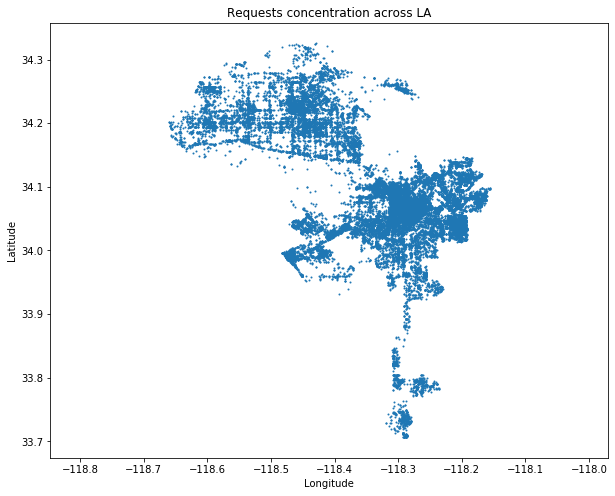

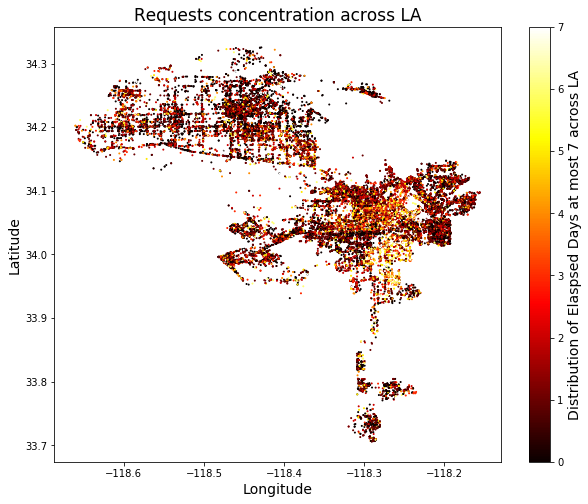

In [6]:
df_week[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Requests concentration across LA', s=1).axis('equal')

plt.figure(figsize = (10,8))
plt.scatter(df_week['Longitude'], df_week['Latitude'], c=df_week['Elapsed Days'], cmap = 'hot', s=1)
plt.colorbar().set_label('Distribution of Elaspsed Days at most 7 across LA', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Requests concentration across LA', fontsize=17)
plt.show()

In [7]:
#round lat/lons to nearest tenth point and count for each 10th

df_week[['Latitude', 'Longitude']] = df_week[['Latitude', 'Longitude']].round(decimals = 1)
#print(df_weekcoord)

df_week['Latitude'] = df_week['Latitude'].astype(str)
df_week['Longitude'] = df_week['Longitude'].astype(str)
df_week['Location'] = '(' + df_week['Latitude'] + ',' + df_week['Longitude'] + ')'

#print(df_week['Location'])

list_locations = df_week['Location'].unique()
list_numloc = list()
dict_loc = dict()
for loc in list_locations: 
    is_location = df_week['Location'] == loc
    df_loc = df_week[is_location]
    list_numloc.append(len(df_loc))
    addToDict = {loc: len(df_loc)}
    dict_loc.update(addToDict)
    #print(addToDict)

dict_loc = {k: v for (k, v) in sorted(dict_loc.items(), reverse=True, key=lambda item: item[1])}
#print(dict_loc)

list_items = []
for key in dict_loc.keys():
    list_items.append(key)


print('Top 4 coordinate regions:',list_items[0:4])



C:\Users\hanaa\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Top 4 coordinate regions: ['(34.1,-118.3)', '(34.1,-118.2)', '(34.0,-118.3)', '(34.2,-118.4)']
